**Visualising the possible relationship between cosine similarity difference and correct tweet predictions**

Cosine similarity is a similarity metric between vectors. In our case, we compare how similar the tweets are to these base positive and negative words.

```
self.ref_pos = ['love', 'best', 'beautiful', 'great', 'cool', 'awesome', 'wonderful', 'brilliant', 'excellent', 'fantastic']

self.ref_neg = ['bad', 'worst', 'stupid', 'disappointing', 'terrible', 'rubbish', 'boring', 'awful', 'unwatchable', 'awkward']
```

cos_sim_good and cos_sim_bad values are then calculated for every tweet.

```
cos_sim_bad - cos_sim_good < -0.5 # predicted positive
cos_sim_bad * self.neg_coefficient <= cos_sim_good * self.pos_coefficient # predicted positive

#cos_sim_bad - cos_sim_good > 0.5 # predicted negative
#cos_sim_bad * self.neg_coefficient >= cos_sim_good * self.pos_coefficient # predicted negative
```

Tweet sentiment predictions are made based on the above conditions.

The cosine similarity difference for every tweet is then calculated as such:


*cosine similarity difference = cos_sim_good - cos_sim_bad*




In [ ]:
import pandas as pd

csd_cg_data = pd.read_csv('csd_cg_data.csv')
csd_cg_data.head()

,predictions,truth,cosine similarity difference,correct.guess
0,1,0,0.046821,0
1,1,1,0.042952,1
2,1,1,0.001481,1
3,1,1,0.040193,1
4,1,0,0.001362,0


In [ ]:
csd_cg_data.shape

(346000, 4)

In [ ]:
cg_0 = csd_cg_data.loc[csd_cg_data['correct.guess'] == 0]
cg_0.head()

,predictions,truth,cosine similarity difference,correct.guess
0,1,0,0.046821,0
4,1,0,0.001362,0
5,1,0,0.042110,0
6,1,0,0.041495,0
9,0,1,0.001332,0


In [ ]:
cg_1 = csd_cg_data.loc[csd_cg_data['correct.guess'] == 1]
cg_1.head()

,predictions,truth,cosine similarity difference,correct.guess
1,1,1,0.042952,1
2,1,1,0.001481,1
3,1,1,0.040193,1
7,1,1,0.025790,1
8,1,1,0.029151,1


In [ ]:
cg_0.shape

(82870, 4)

In [ ]:
cg_1.shape

(263130, 4)

In [ ]:
cg_0['text.no'] = range(1, 82871)
cg_1['text.no'] = range(1, 263131)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Checking for changes...

In [ ]:
cg_0.head()
cg_1.head()

,predictions,truth,cosine similarity difference,correct.guess,text.no
1,1,1,0.042952,1,1
2,1,1,0.001481,1,2
3,1,1,0.040193,1,3
7,1,1,0.025790,1,4
8,1,1,0.029151,1,5


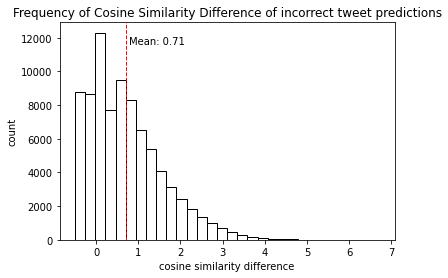

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cg_0['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("cosine similarity difference")
plt.ylabel("count")
plt.title("Frequency of Cosine Similarity Difference of incorrect tweet predictions")
plt.axvline(cg_0['cosine similarity difference'].mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_0['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_0['cosine similarity difference'].mean()))

plt.show()

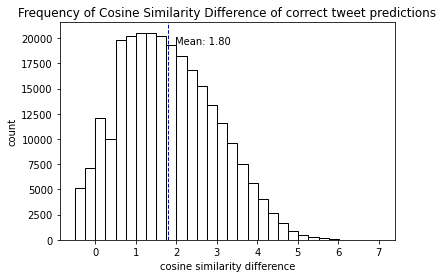

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cg_1['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("cosine similarity difference")
plt.ylabel("count")
plt.title("Frequency of Cosine Similarity Difference of correct tweet predictions")
plt.axvline(cg_1['cosine similarity difference'].mean(), color='b', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_1['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_1['cosine similarity difference'].mean()))

plt.show()

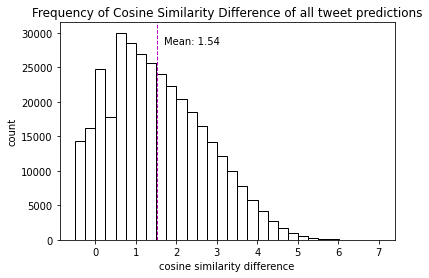

In [ ]:
import matplotlib.pyplot as plt

plt.hist(csd_cg_data['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("cosine similarity difference")
plt.ylabel("count")
plt.title("Frequency of Cosine Similarity Difference of all tweet predictions")
plt.axvline(csd_cg_data['cosine similarity difference'].mean(), color='m', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(csd_cg_data['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(csd_cg_data['cosine similarity difference'].mean()))

plt.show()

**Normalisation of Cosine Similarity Difference & Correct Guess data**

Upon normalisation of data by dividing cos_sim_good and cos_sim_bad by k_cur which determines how many positive and negative reference words are used, 

we get a more symmetric normal distribution of data points for the entire dataset.

In [ ]:
import pandas as pd

csd_cg_data_normalised = pd.read_csv('csd_cg_data_normalised.csv')
csd_cg_data_normalised.head()

,predictions,truth,cosine similarity difference,correct.guess
0,1,0,0.027175,0
1,1,1,0.023638,1
2,1,1,0.023129,1
3,1,1,0.024362,1
4,1,0,0.021526,0


In [ ]:
csd_cg_data_normalised.shape

(386000, 4)

In [ ]:
cg_0_normalised = csd_cg_data_normalised.loc[csd_cg_data_normalised['correct.guess'] == 0]
cg_0_normalised.head()

,predictions,truth,cosine similarity difference,correct.guess
0,1,0,0.027175,0
4,1,0,0.021526,0
5,1,0,0.024026,0
6,1,0,0.025843,0
10,1,0,0.023435,0


In [ ]:
cg_1_normalised = csd_cg_data_normalised.loc[csd_cg_data_normalised['correct.guess'] == 1]
cg_1_normalised.head()

,predictions,truth,cosine similarity difference,correct.guess
1,1,1,0.023638,1
2,1,1,0.023129,1
3,1,1,0.024362,1
7,1,1,0.023052,1
8,1,1,0.024814,1


In [ ]:
cg_0_normalised.shape

(175771, 4)

In [ ]:
cg_1_normalised.shape

(210229, 4)

In [ ]:
cg_0_normalised['text.no'] = range(1, 175772)
cg_1_normalised['text.no'] = range(1, 210230)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Checking for changes...

In [ ]:
cg_0_normalised.head()
cg_1_normalised.head()

,predictions,truth,cosine similarity difference,correct.guess,text.no
1,1,1,0.023638,1,1
2,1,1,0.023129,1,2
3,1,1,0.024362,1,3
7,1,1,0.023052,1,4
8,1,1,0.024814,1,5


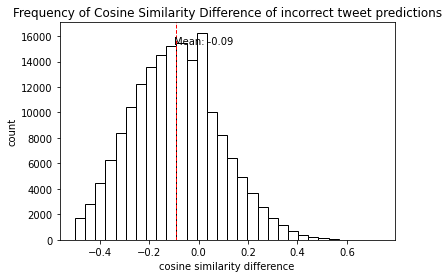

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cg_0_normalised['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("cosine similarity difference")
plt.ylabel("count")
plt.title("Frequency of Cosine Similarity Difference of incorrect tweet predictions")
plt.axvline(cg_0_normalised['cosine similarity difference'].mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_0_normalised['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_0_normalised['cosine similarity difference'].mean()))

plt.show()

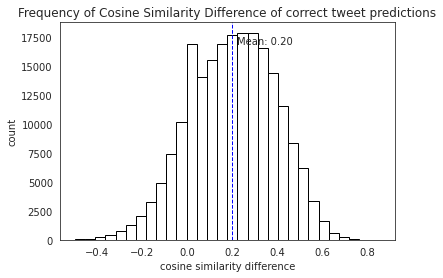

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cg_1_normalised['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("cosine similarity difference")
plt.ylabel("count")
plt.title("Frequency of Cosine Similarity Difference of correct tweet predictions")
plt.axvline(cg_1_normalised['cosine similarity difference'].mean(), color='b', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_1_normalised['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_1_normalised['cosine similarity difference'].mean()))

plt.show()

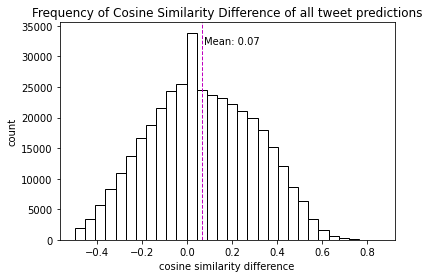

In [ ]:
import matplotlib.pyplot as plt

plt.hist(csd_cg_data_normalised['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("cosine similarity difference")
plt.ylabel("count")
plt.title("Frequency of Cosine Similarity Difference of all tweet predictions")
plt.axvline(csd_cg_data_normalised['cosine similarity difference'].mean(), color='m', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(csd_cg_data_normalised['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(csd_cg_data_normalised['cosine similarity difference'].mean()))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


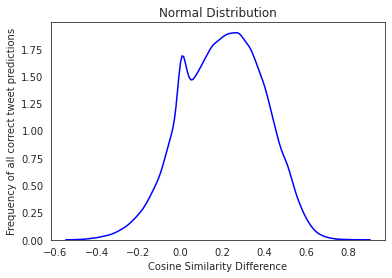

In [ ]:
import seaborn as sns

sns.set_style('white')
ax = sns.distplot(cg_1_normalised['cosine similarity difference'],
                  bins=30,
                  kde= True,
                  color='b',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Cosine Similarity Difference', ylabel='Frequency of all correct tweet predictions', title='Normal Distribution')
 
plt.show()

**Formula:**

pdf of normal distribution: 1/(sqrt(2 * pi * sigma^2)) * exp(-(x-mu)^2/(2*sigma^2))

where sigma = std dev & mu = mean 


```
cg_1_normalised['cosine similarity difference'].std()
#sigma = 0.19

cg_1_normalised['cosine similarity difference'].mean()
#mu = 0.20
```

For any x-value of cosine similarity difference, we can get an estimate of the frequency of tweets that get classified correctly by PLStream classification mode.

**Confidence Evaluation using Cosine Similarity Difference and related variables**

Confidence intervals can be calculated for two statistical parameters: proportion & mean. In our case, we will use sample mean as our statistical parameter.

For this research, we work with 95% confidence interval. 

*Important note: 95% confidence interval does not mean 95% probability.*

A z-score denotes how far a point is from the sample mean. For a 95% confidence interval, the z-score is 1.96.

CI = [sample mean - margin of error, sample mean + margin of error]
 
Margin of error = z * standard error for mean 

Standard error for mean = standard deviation / sqrt(number of observations)

**Data preparation before evaluation of confidence intervals based on cosine similarity difference and frequency of correct predictions**

In [ ]:
csd_cg_data_normalised['correct.guess'] = csd_cg_data_normalised['correct.guess'].replace({1: "correct", 0: "wrong"})
csd_cg_data_normalised.head()

,predictions,truth,cosine similarity difference,correct.guess
0,1,0,0.027175,wrong
1,1,1,0.023638,correct
2,1,1,0.023129,correct
3,1,1,0.024362,correct
4,1,0,0.021526,wrong


In [ ]:
import numpy as np
csd_cg_data_normalised.groupby("correct.guess").agg({"cosine similarity difference": [np.mean, np.std, np.size]})

cosine similarity difference                  
                                      mean       std    size
correct.guess                                               
correct                           0.201345  0.191036  210229
wrong                            -0.091438  0.179190  175771

These results are consistent with the sample means of the visualised distributions.

**Confidence intervals of correct tweet predictions**

***Values needed:***

mean_cg1 = 0.201 

sd = 0.191

n = 210229

z = 1.96         

In [ ]:
se_cg1 = 0.191 /np.sqrt(210229)
print(se_cg1)

0.0004165691028925967


In [ ]:
lower_limit_cg1 = 0.201 - 1.96* 0.0004165691028925967  
print('Lower limit of CI of correct tweet predictions: %.5f' % lower_limit_cg1)
upper_limit_cg1 = 0.201 + 1.96* 0.0004165691028925967  
print('Upper limit of CI of correct tweet predictions: %.5f' % upper_limit_cg1)

Lower limit of CI of correct tweet predictions: 0.20018
Upper limit of CI of correct tweet predictions: 0.20182


***Inference:*** The true mean of the cosine similarity difference of tweets correctly predicted by PLStream model will fall between 0.20018 and 0.20182.

**Confidence intervals of incorrect tweet predictions**

***Values needed:***

mean_cg0 = -0.091

sd = 0.179

n = 175771

z = 1.96         

In [ ]:
se_cg0 = 0.179 /np.sqrt(175771)
print(se_cg0)

0.00042695236071870233


In [ ]:
lower_limit_cg0 = -0.091 - 1.96* 0.00042695236071870233  
print('Lower limit of CI of correct tweet predictions: %.5f' % lower_limit_cg0)
upper_limit_cg0 = -0.091 + 1.96* 0.00042695236071870233
print('Upper limit of CI of correct tweet predictions: %.5f' % upper_limit_cg0)

Lower limit of CI of correct tweet predictions: -0.09184
Upper limit of CI of correct tweet predictions: -0.09016


***Inference:*** The true mean of the cosine similarity difference of tweets incorrectly predicted by PLStream model will fall between -0.09184 and -0.09016.

**Pooling Approaches** are used to calculate the confidence interval for the difference in the mean of two populations.

In [ ]:
import numpy as np
csd_cg_data_normalised.groupby("correct.guess").agg({"cosine similarity difference": [np.mean, np.std, np.size]})

cosine similarity difference                  
                                      mean       std    size
correct.guess                                               
correct                           0.201345  0.191036  210229
wrong                            -0.091438  0.179190  175771

Variance is the square of standard deviation.

Variation of correct guess population = 0.0365

Variation of wrong guess population = 0.0321

Since the variance of the two populations almost the same, we can use the pooled approach.

***Values needed to find the confidence interval for the difference in the means of correct and wrong predictions:***

n_cg1 = 210229

n_cg0 = 175771

mean_cg1 = 0.201345

mean_cg0 = -0.091438

sd_cg1 = 0.191036

sd_cg0 = 0.179190

In [ ]:
n_cg1 = 210229
n_cg0 = 175771
mean_cg1 = 0.201345
mean_cg0 = -0.091438
sd_cg1 = 0.191036
sd_cg0 = 0.179190

**Calculating standard errors**

In [ ]:
se_cg1 = sd_cg1 /np.sqrt(n_cg1)
print(se_cg1)

0.00041664761853502677


In [ ]:
se_cg0 = sd_cg0 /np.sqrt(n_cg0)
print(se_cg0)

0.0004274055503753311


In [ ]:
mean_cg1 = 0.201345
mean_cg0 = -0.091438

mean_difference = mean_cg1 - mean_cg0
print(mean_difference)

0.292783


In [ ]:
import numpy as np
se_difference = (np.sqrt((n_cg1-1)*se_cg1**2 + (n_cg0-1)*se_cg0**2)/(n_cg1+n_cg0-2))*(np.sqrt(1/n_cg1 + 1/n_cg0))
print(se_difference)

2.1931162964312418e-09


We get a very small standard error difference.

In [ ]:
pooled_approach_ci_lower_limit = mean_difference - 1.96* se_difference  
print('Lower limit of CI after pooling: %.5f' % pooled_approach_ci_lower_limit)
pooled_approach_ci_upper_limit = mean_difference + 1.96* se_difference  
print('Upper limit of CI after pooling: %.5f' % pooled_approach_ci_upper_limit)

Lower limit of CI after pooling: 0.29278
Upper limit of CI after pooling: 0.29278


The lower and upper limit of the confidence interval calculated using pooled approach are almost the same. 

Hence, the means of cosine similarity difference for correct and incorrect tweet predictions are not very different from each other.

**Recap of the inferences:**

 
*   The true mean of the cosine similarity difference of tweets correctly predicted by PLStream model will fall between 0.20018 and 0.20182.
*   The true mean of the cosine similarity difference of tweets incorrectly predicted by PLStream model will fall between -0.09184 and -0.09016.

